# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


Enter the last digit of your SB ID: 7
x_T: 5.313021092124361e-13


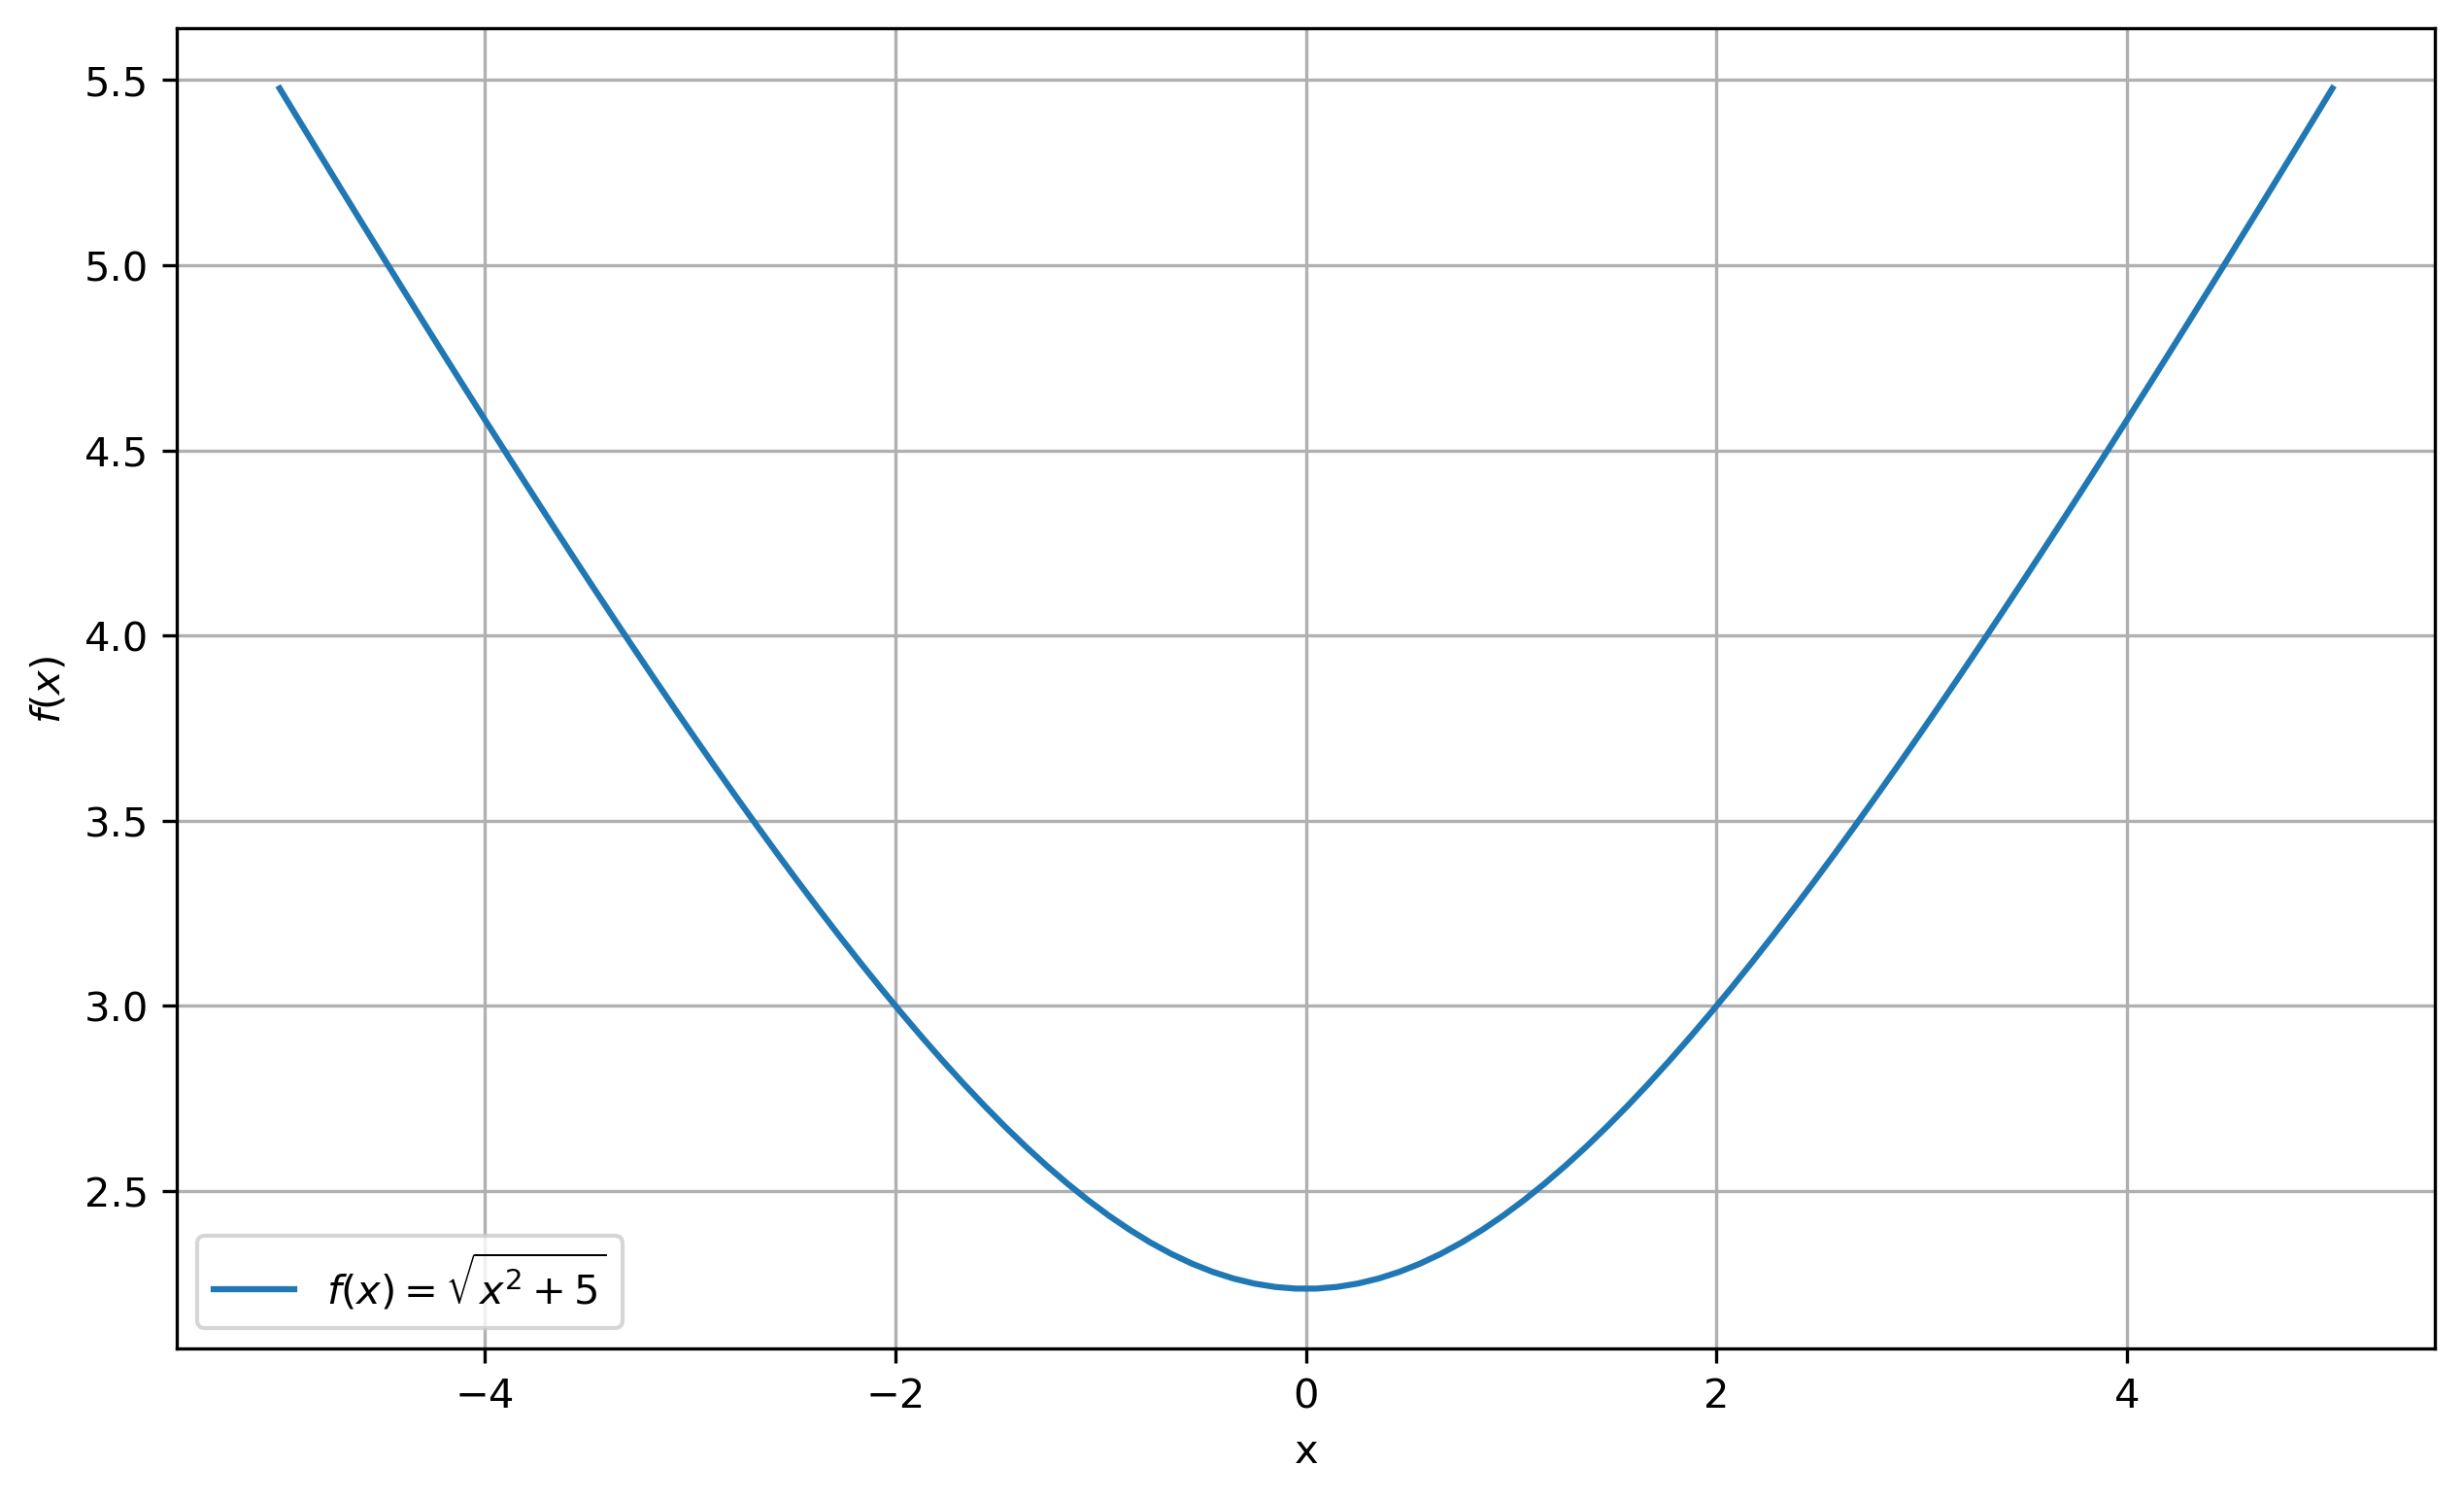

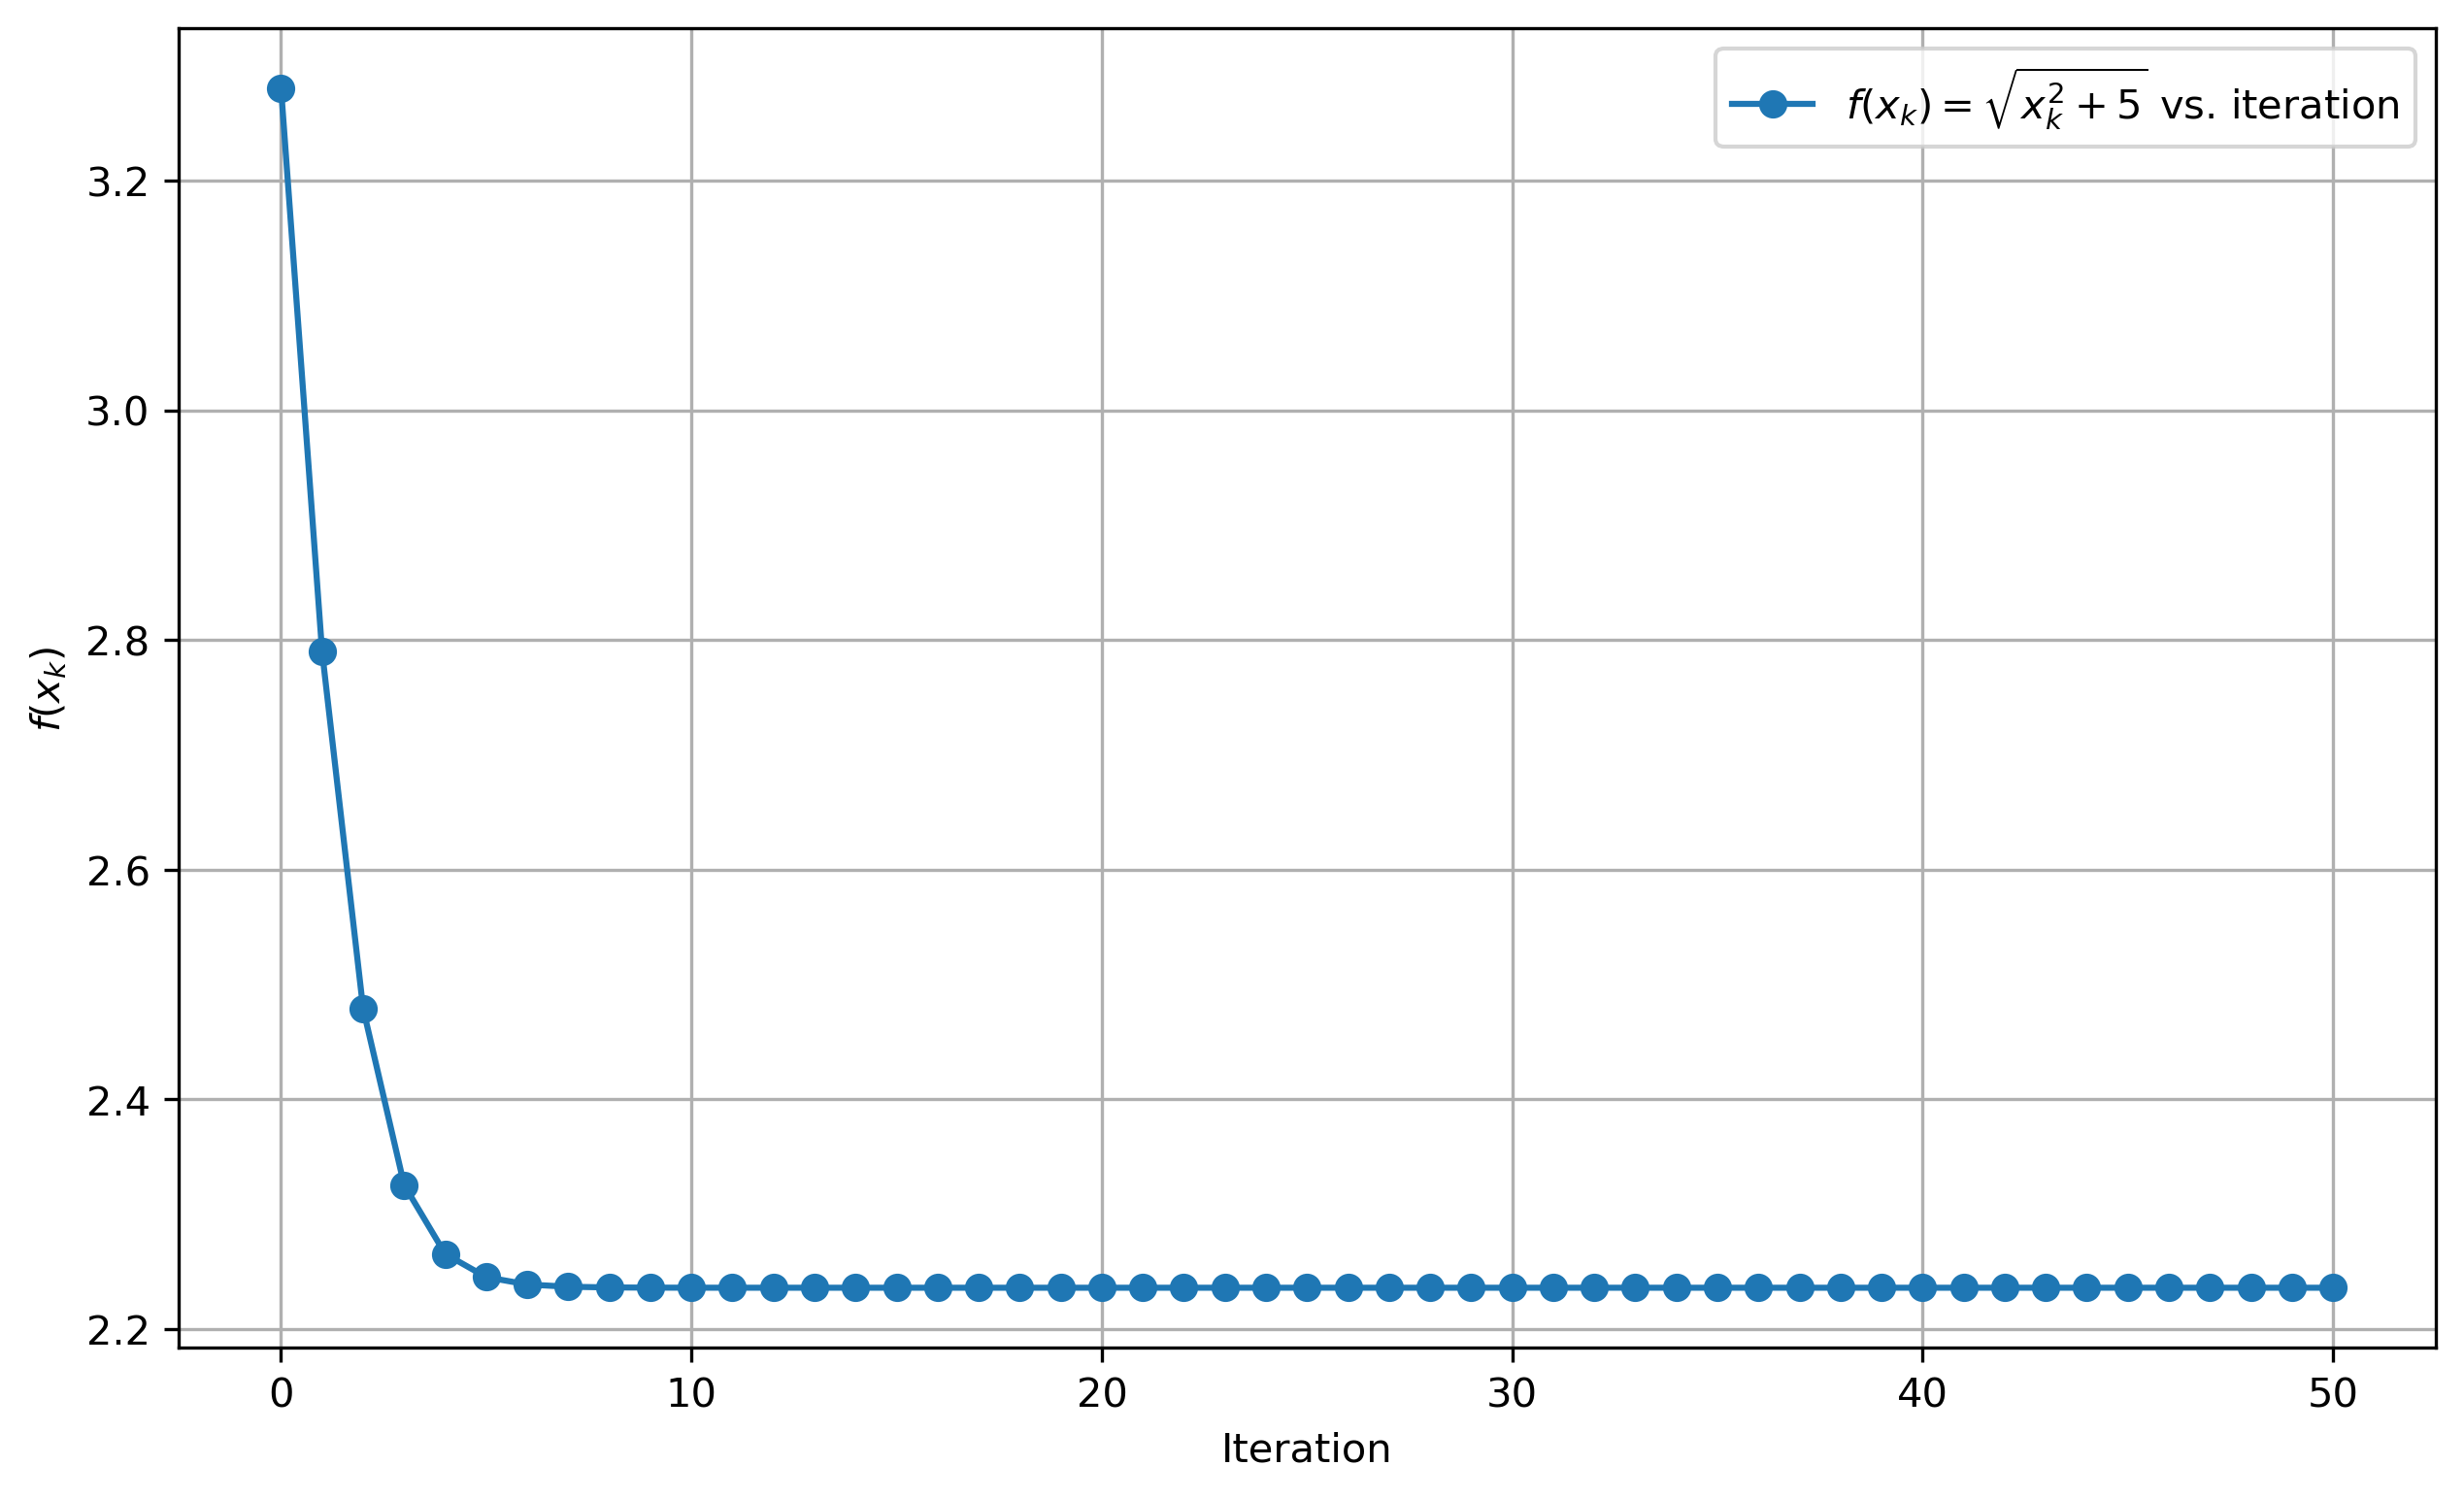

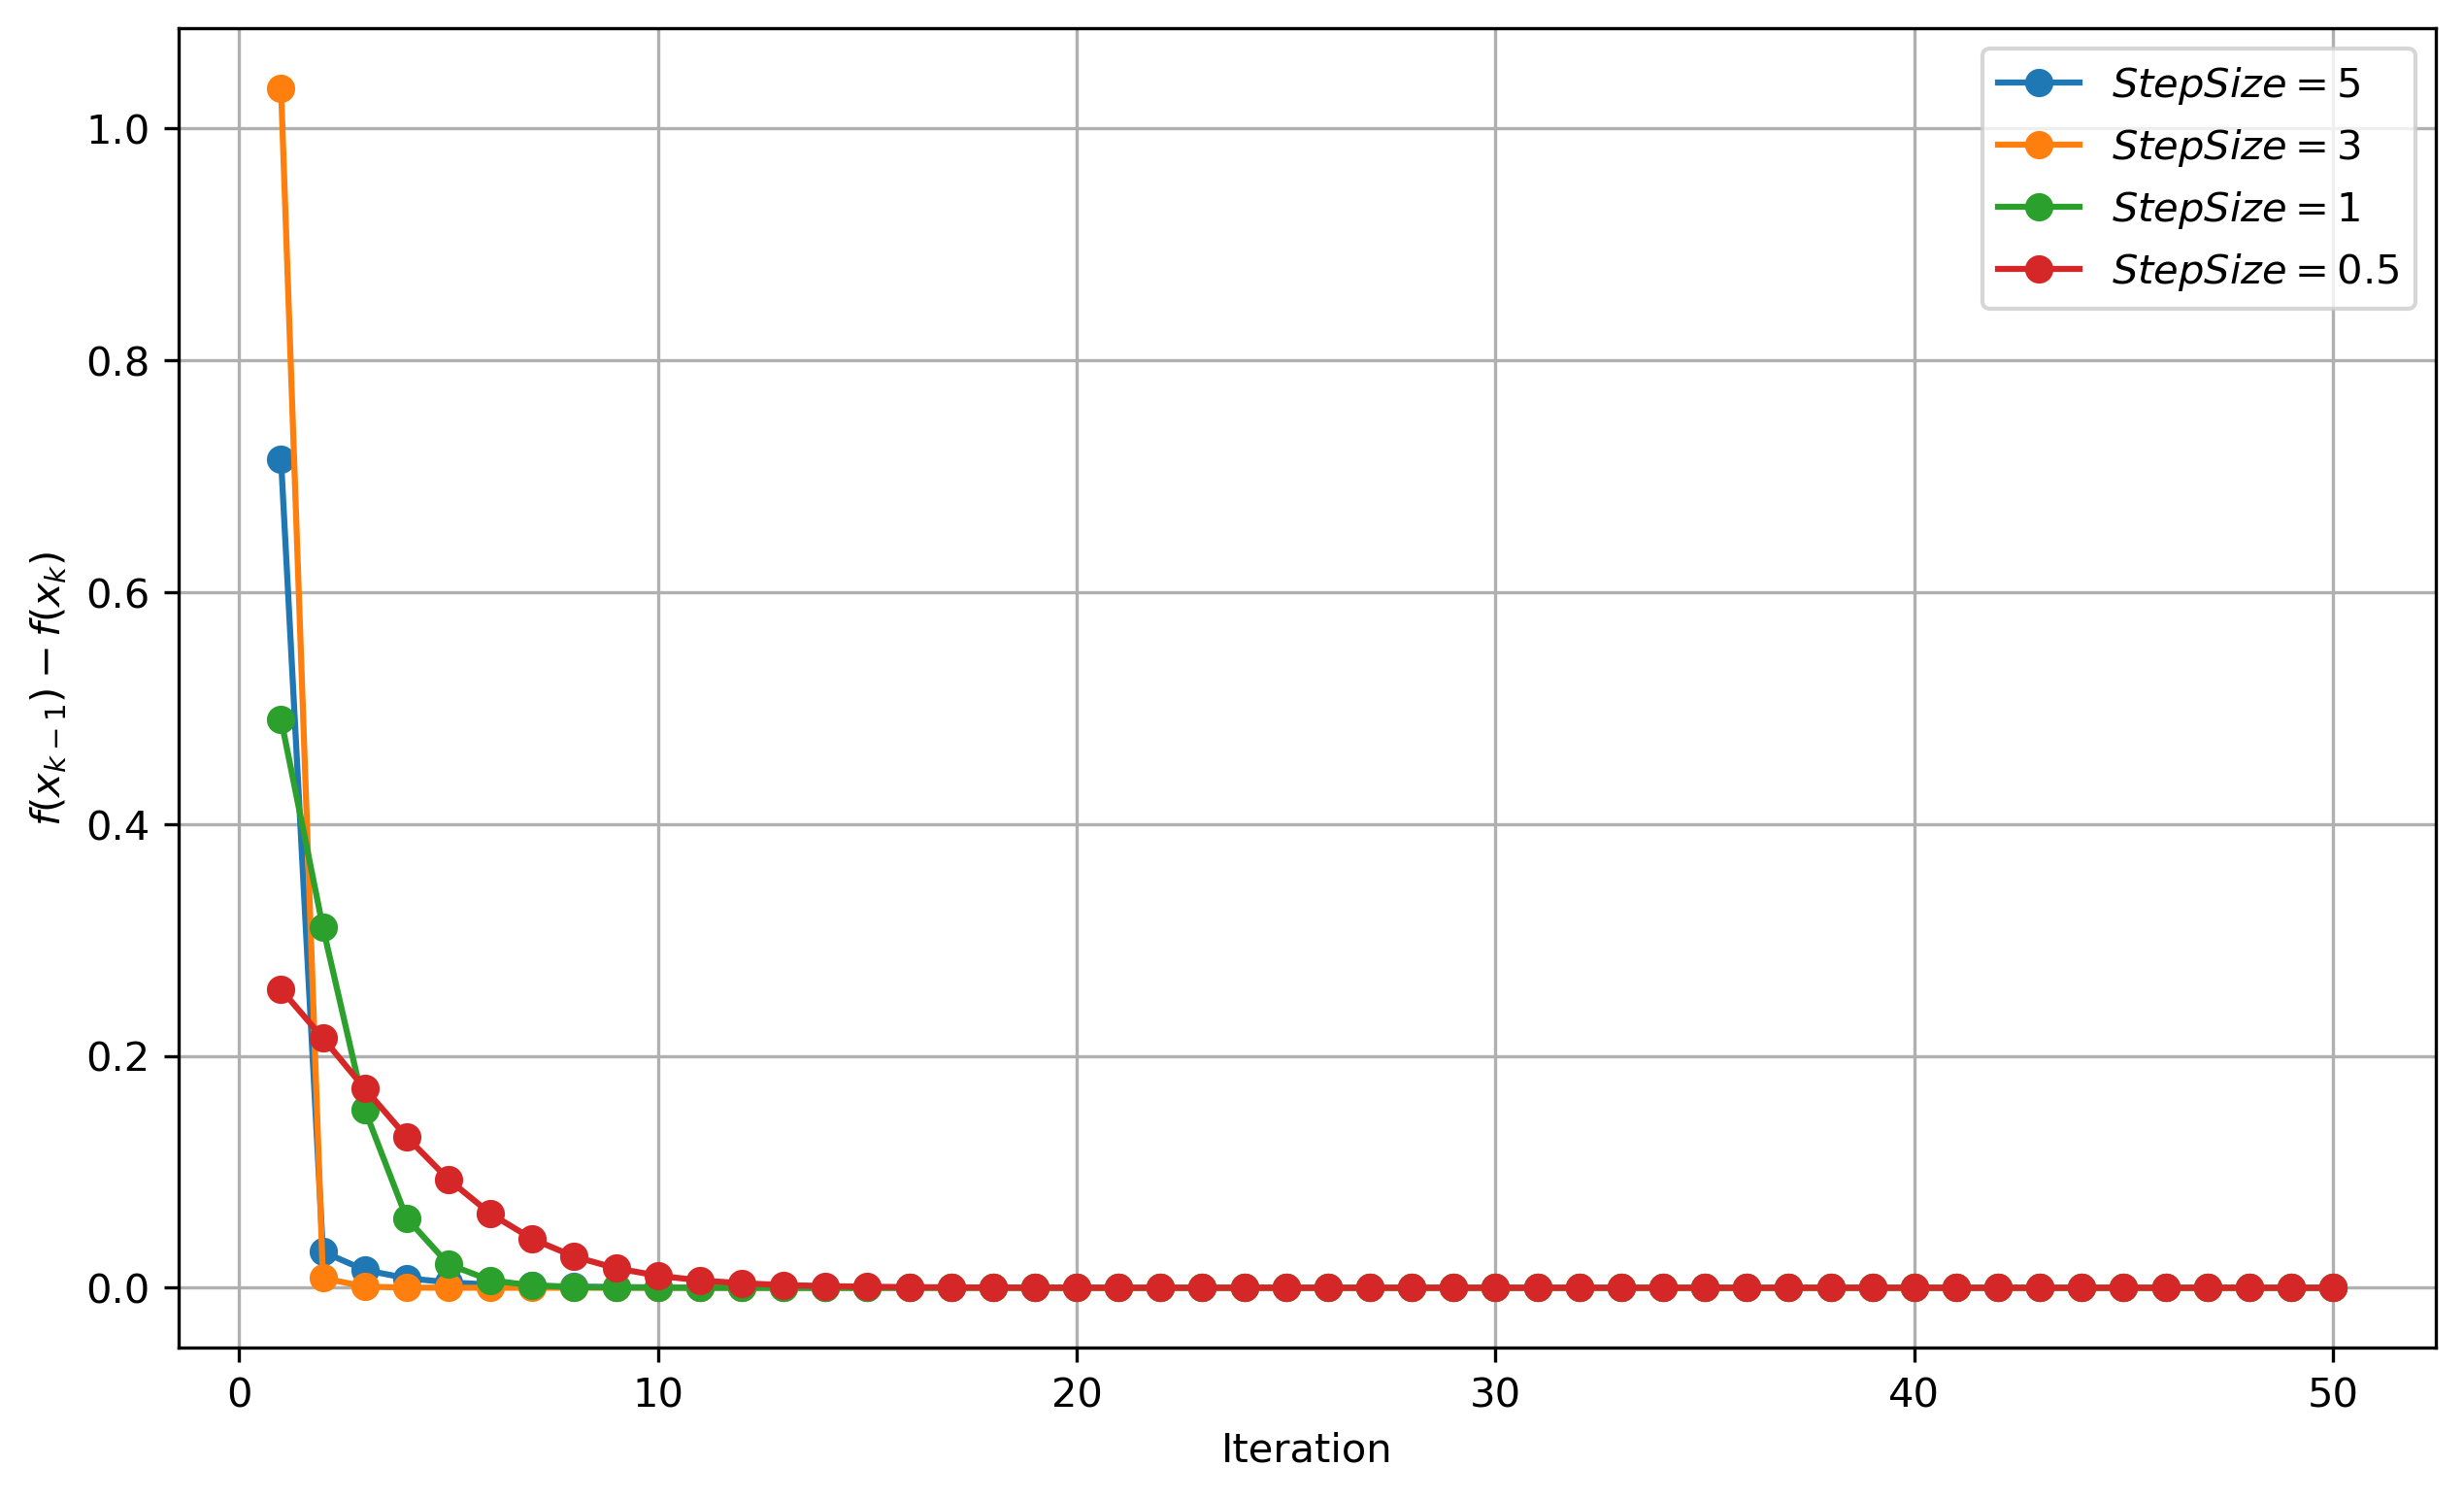

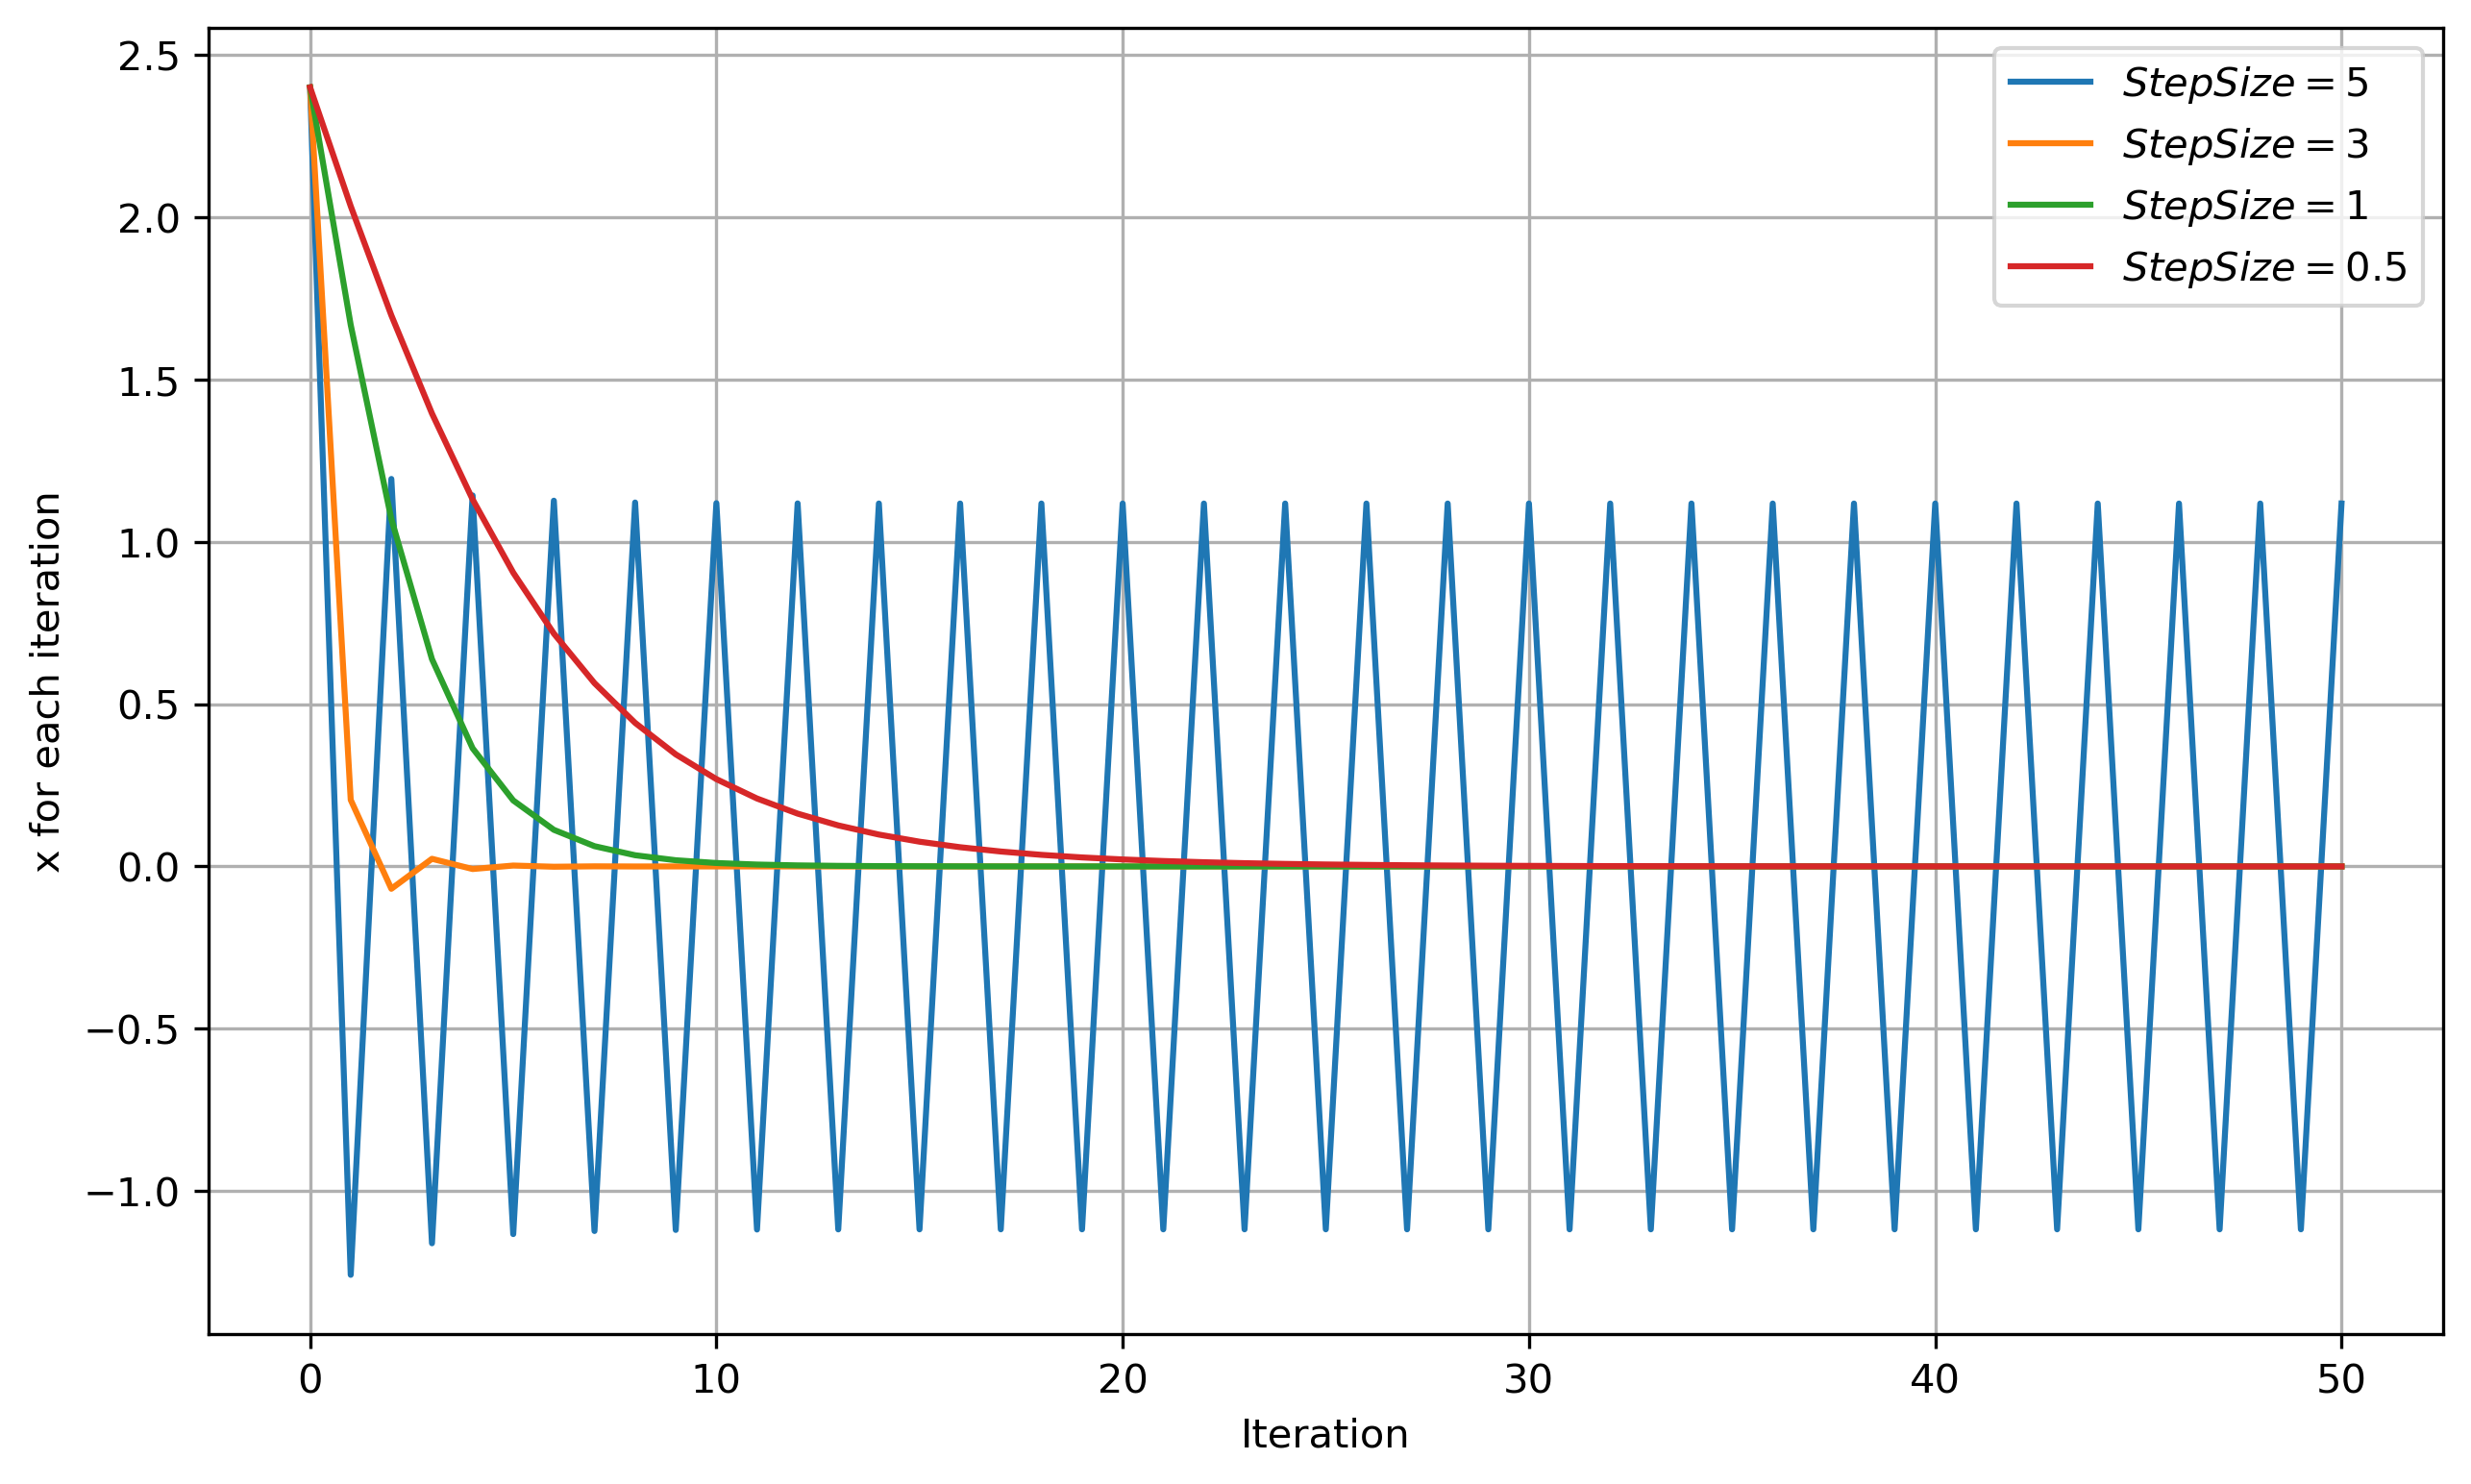

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)

# Task 1: Plot the function f(x) over the interval [-5, 5].
x_range = np.linspace(-5, 5, 100)
y_values = f(x_range)
plt.figure(dpi = 300, figsize = (10, 6))  # Create a new figure
plt.plot(x_range, y_values, label='$f(x) = \\sqrt{x^2 + 5}$')  # Plot f(x) and set a label with LaTeX notation
plt.xlabel('x')
plt.ylabel('$f(x)$')  # Label the y-axis with LaTeX notation
plt.legend()
plt.grid()

# Task 2, 3, and 4: Gradient Descent
def df(x):
    return x / np.sqrt(x**2 + 5)

def gradient_descent(x_0, step_size, num_iterations):
    x_values = [x_0]  # Create a list to store x_k values
    for _ in range(num_iterations):
        x_new = x_values[-1] - step_size * df(x_values[-1])  # Update x_k using gradient descent
        x_values.append(x_new)  # Append the new x_k to the list
    return x_values  # Return the list of x_k values

# Set up/assign initial values (using the last digit of your SB ID)
last_digit = float(input("Enter the last digit of your SB ID: "))  # Input the last digit of my Student ID (7)
x_0 = last_digit / 5 + 1  # Calculate the initial value of x_0
step_size = 1  # Set the initial step size for gradient descent
num_iterations = 50  # Define the number of iterations

# Run gradient descent and record x_k values.
x_values = gradient_descent(x_0, step_size, num_iterations)  # Perform gradient descent
x_T = x_values[-1]  # Get the final x_k value (x_T)
xx=x_values

# Report x_T by printing out the value.
print("x_T:", x_T)

# Plot the value of f(x_k) vs. the iteration number.
y_values_k = [f(x) for x in x_values]
plt.figure(dpi = 300, figsize = (10, 6))  # Create a new figure
plt.plot(range(len(x_values)), y_values_k, marker='o', linestyle='-', label='$f(x_k) = \\sqrt{x_k^2 + 5}$ vs. iteration')  # Plot and label
plt.xlabel('Iteration')
plt.ylabel('$f(x_k)$')  # Label the y-axis with LaTeX notation
plt.legend()
plt.grid()

# Task 5: Varying Step Sizes
step_sizes = [5, 3, 1, 0.5]
results = []  # Create a list to store results for different step sizes
dif_x=[]

for step_size in step_sizes:
    x_values = gradient_descent(x_0, step_size, num_iterations)  # Perform gradient descent for a specific step size
    results.append(x_values)  # Append the results to the list

# Plot the difference in f(x) for different step sizes.
plt.figure(dpi = 300, figsize = (10, 6))
for i, step_size in enumerate(step_sizes):
    y_values_k = [f(x) for x in results[i]]  # Compute function values for this step size
    diff_values = [y_values_k[j - 1] - y_values_k[j] for j in range(1, len(y_values_k))]  # Calculate the difference in f(x)
    plt.plot(range(1, len(y_values_k)), diff_values, marker='o', linestyle='-', label=f'$Step Size = {step_size}$')  # Plot and label

    
plt.xlabel('Iteration')
plt.ylabel('$f(x_{k-1}) - f(x_k)$')  # Label the y-axis with LaTeX notation
plt.legend()
plt.grid()

# Plot the difference in X for different step sizes (The same plot you provided in question).
plt.figure(dpi = 300, figsize = (10, 6))
for i in range(len(step_sizes)):
    step_size = step_sizes[i]
    plt.plot(range(len(results[i])), results[i], linestyle='-', label=f'$Step Size = {step_size}$')
    
plt.xlabel('Iteration')
plt.ylabel('x for each iteration')  # Label the y-axis with LaTeX notation
plt.legend()
plt.grid()   

plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (Bias): 4.590092508012255
Coefficient for X1: 3.6154784180510138
Coefficient for X2: 0.21448024027957746


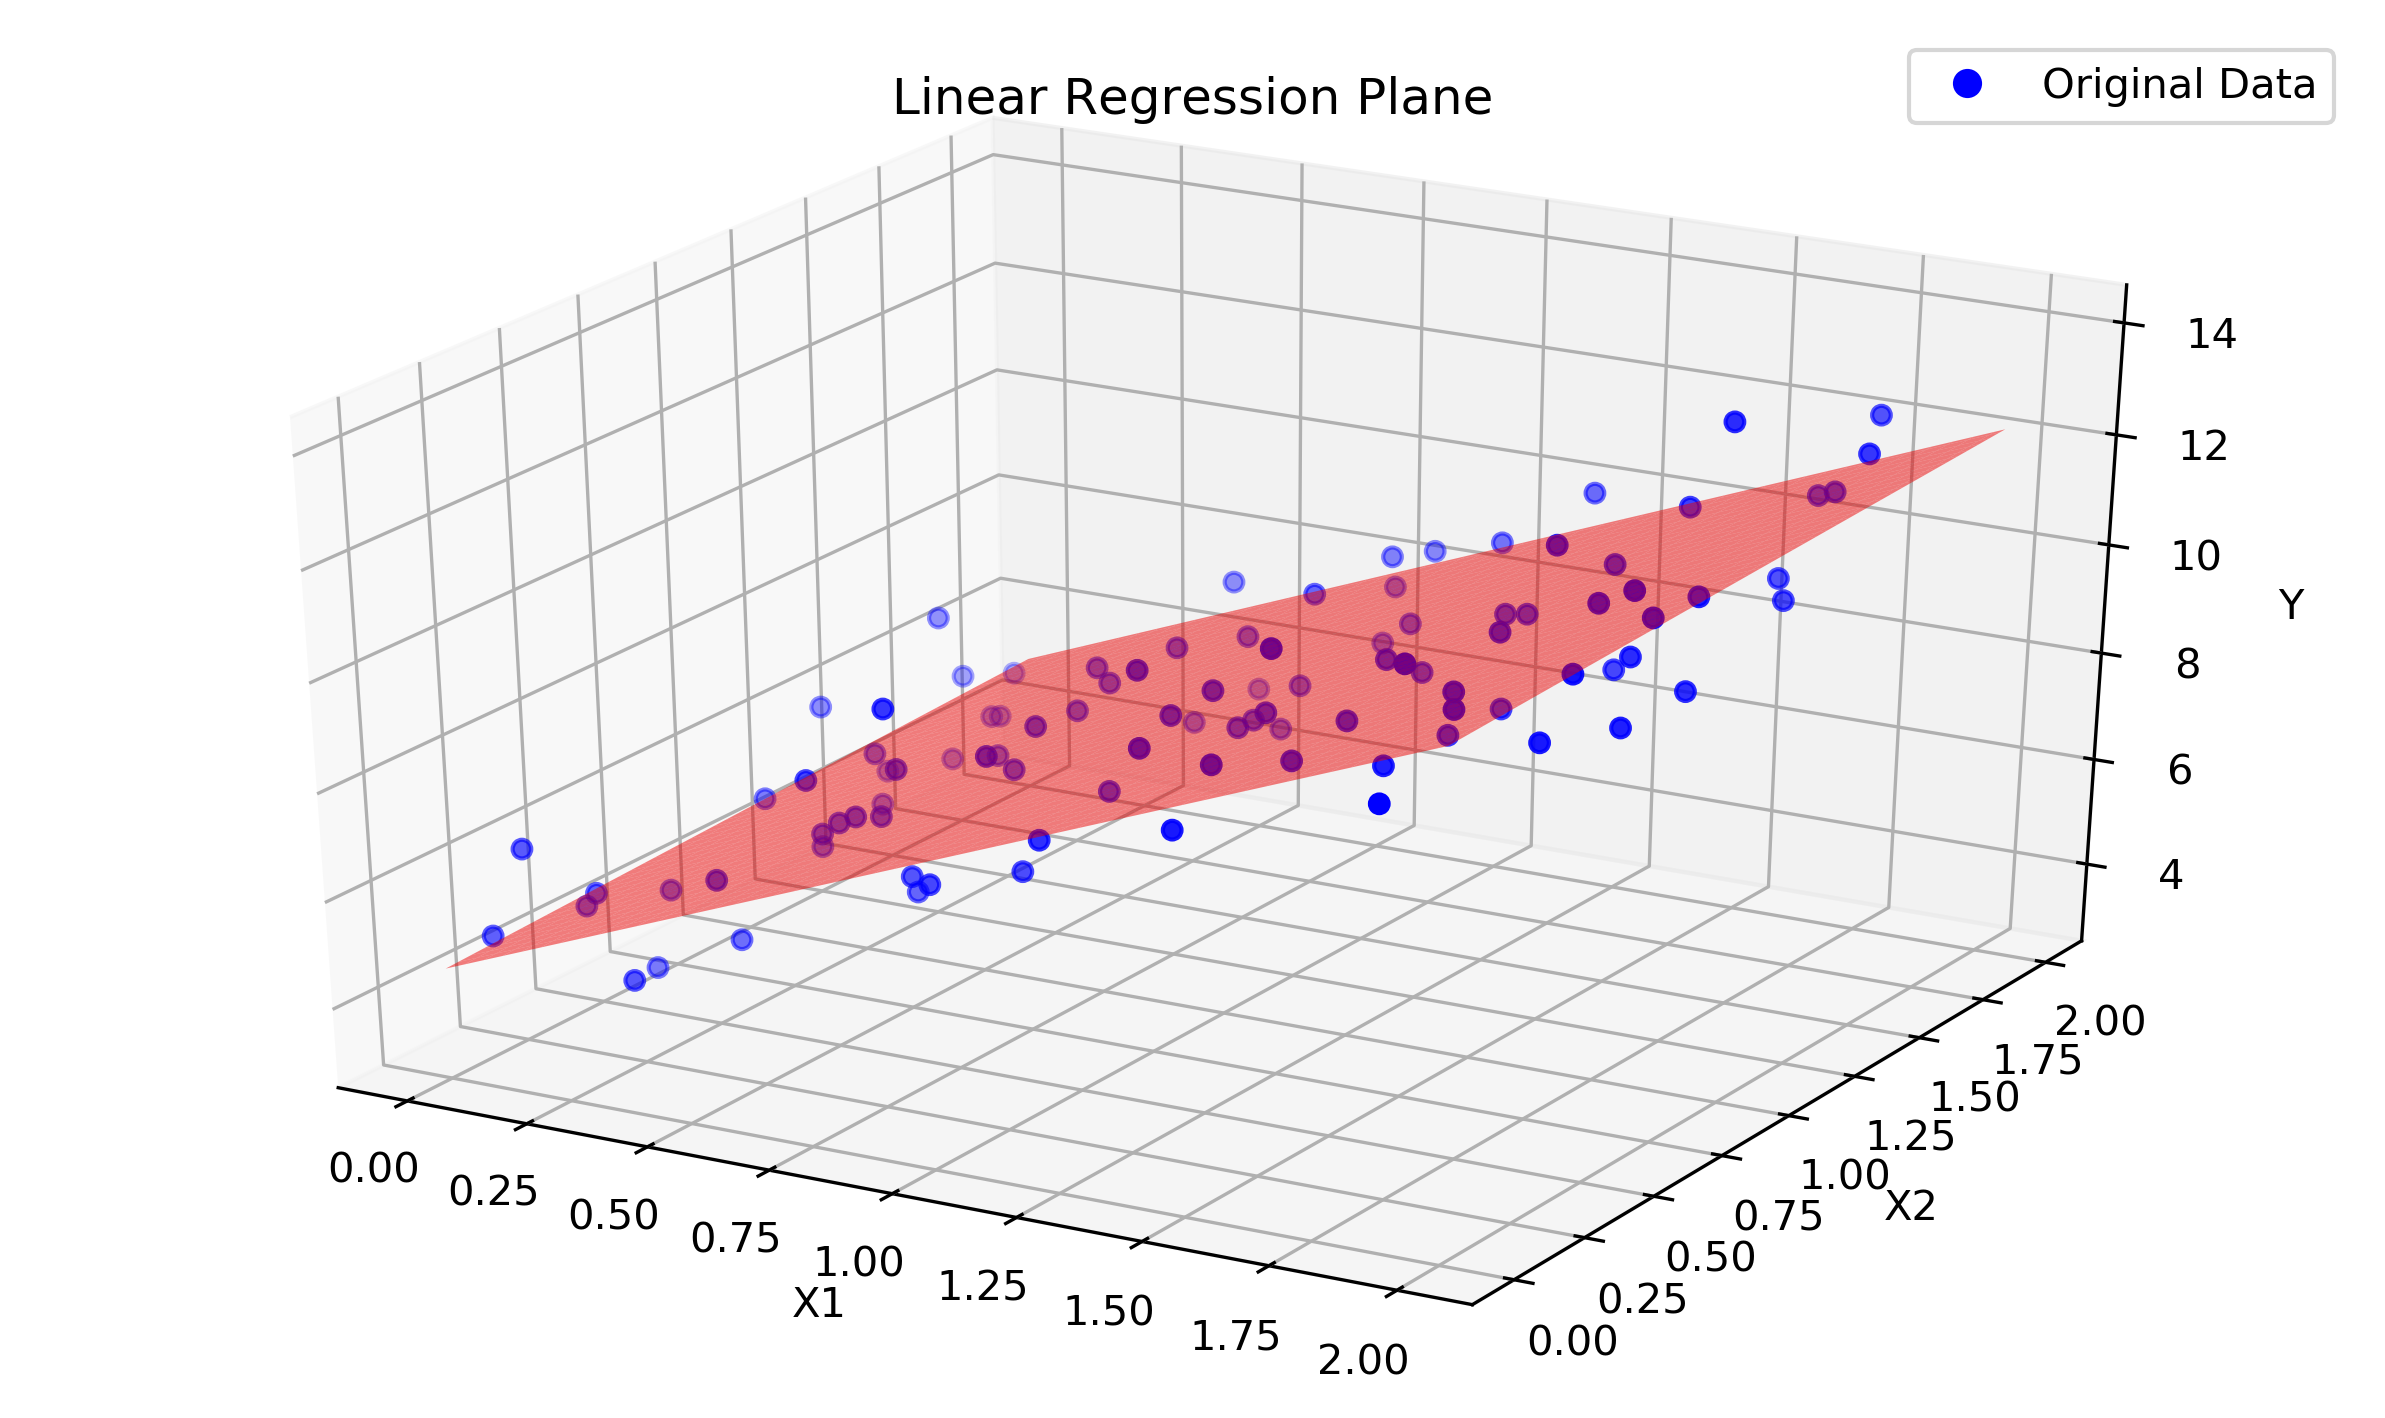

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed based on the last two digits of your student ID
np.random.seed(77)  # Change the seed accordingly

# Generate synthetic data
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]

# Find theta using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract the intercept and coefficients of the regression plane
intercept, coef1, coef2 = theta[0], theta[1], theta[2]

# Print the intercept and coefficients of the regression plane
print("Intercept (Bias):", intercept)
print("Coefficient for X1:", coef1)
print("Coefficient for X2:", coef2)

# Create a mesh grid for the surface plot
x1, x2 = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))
y_pred = intercept + coef1 * x1 + coef2 * x2

# Plot the generated data and the regression plane
fig = plt.figure(dpi = 300, figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')  # Plot the data points in blue
ax.plot_surface(x1, x2, y_pred, color='r', alpha=0.5)  # Plot the regression plane in red

data_points = plt.Line2D([0], [0], linestyle="none", c='b', marker='o', label='Original Data')
# Add the custom legend to the plot
ax.legend(handles=[data_points])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Linear Regression Plane')
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

Training Set Accuracy: 0.91
Test Set Accuracy: 1.00


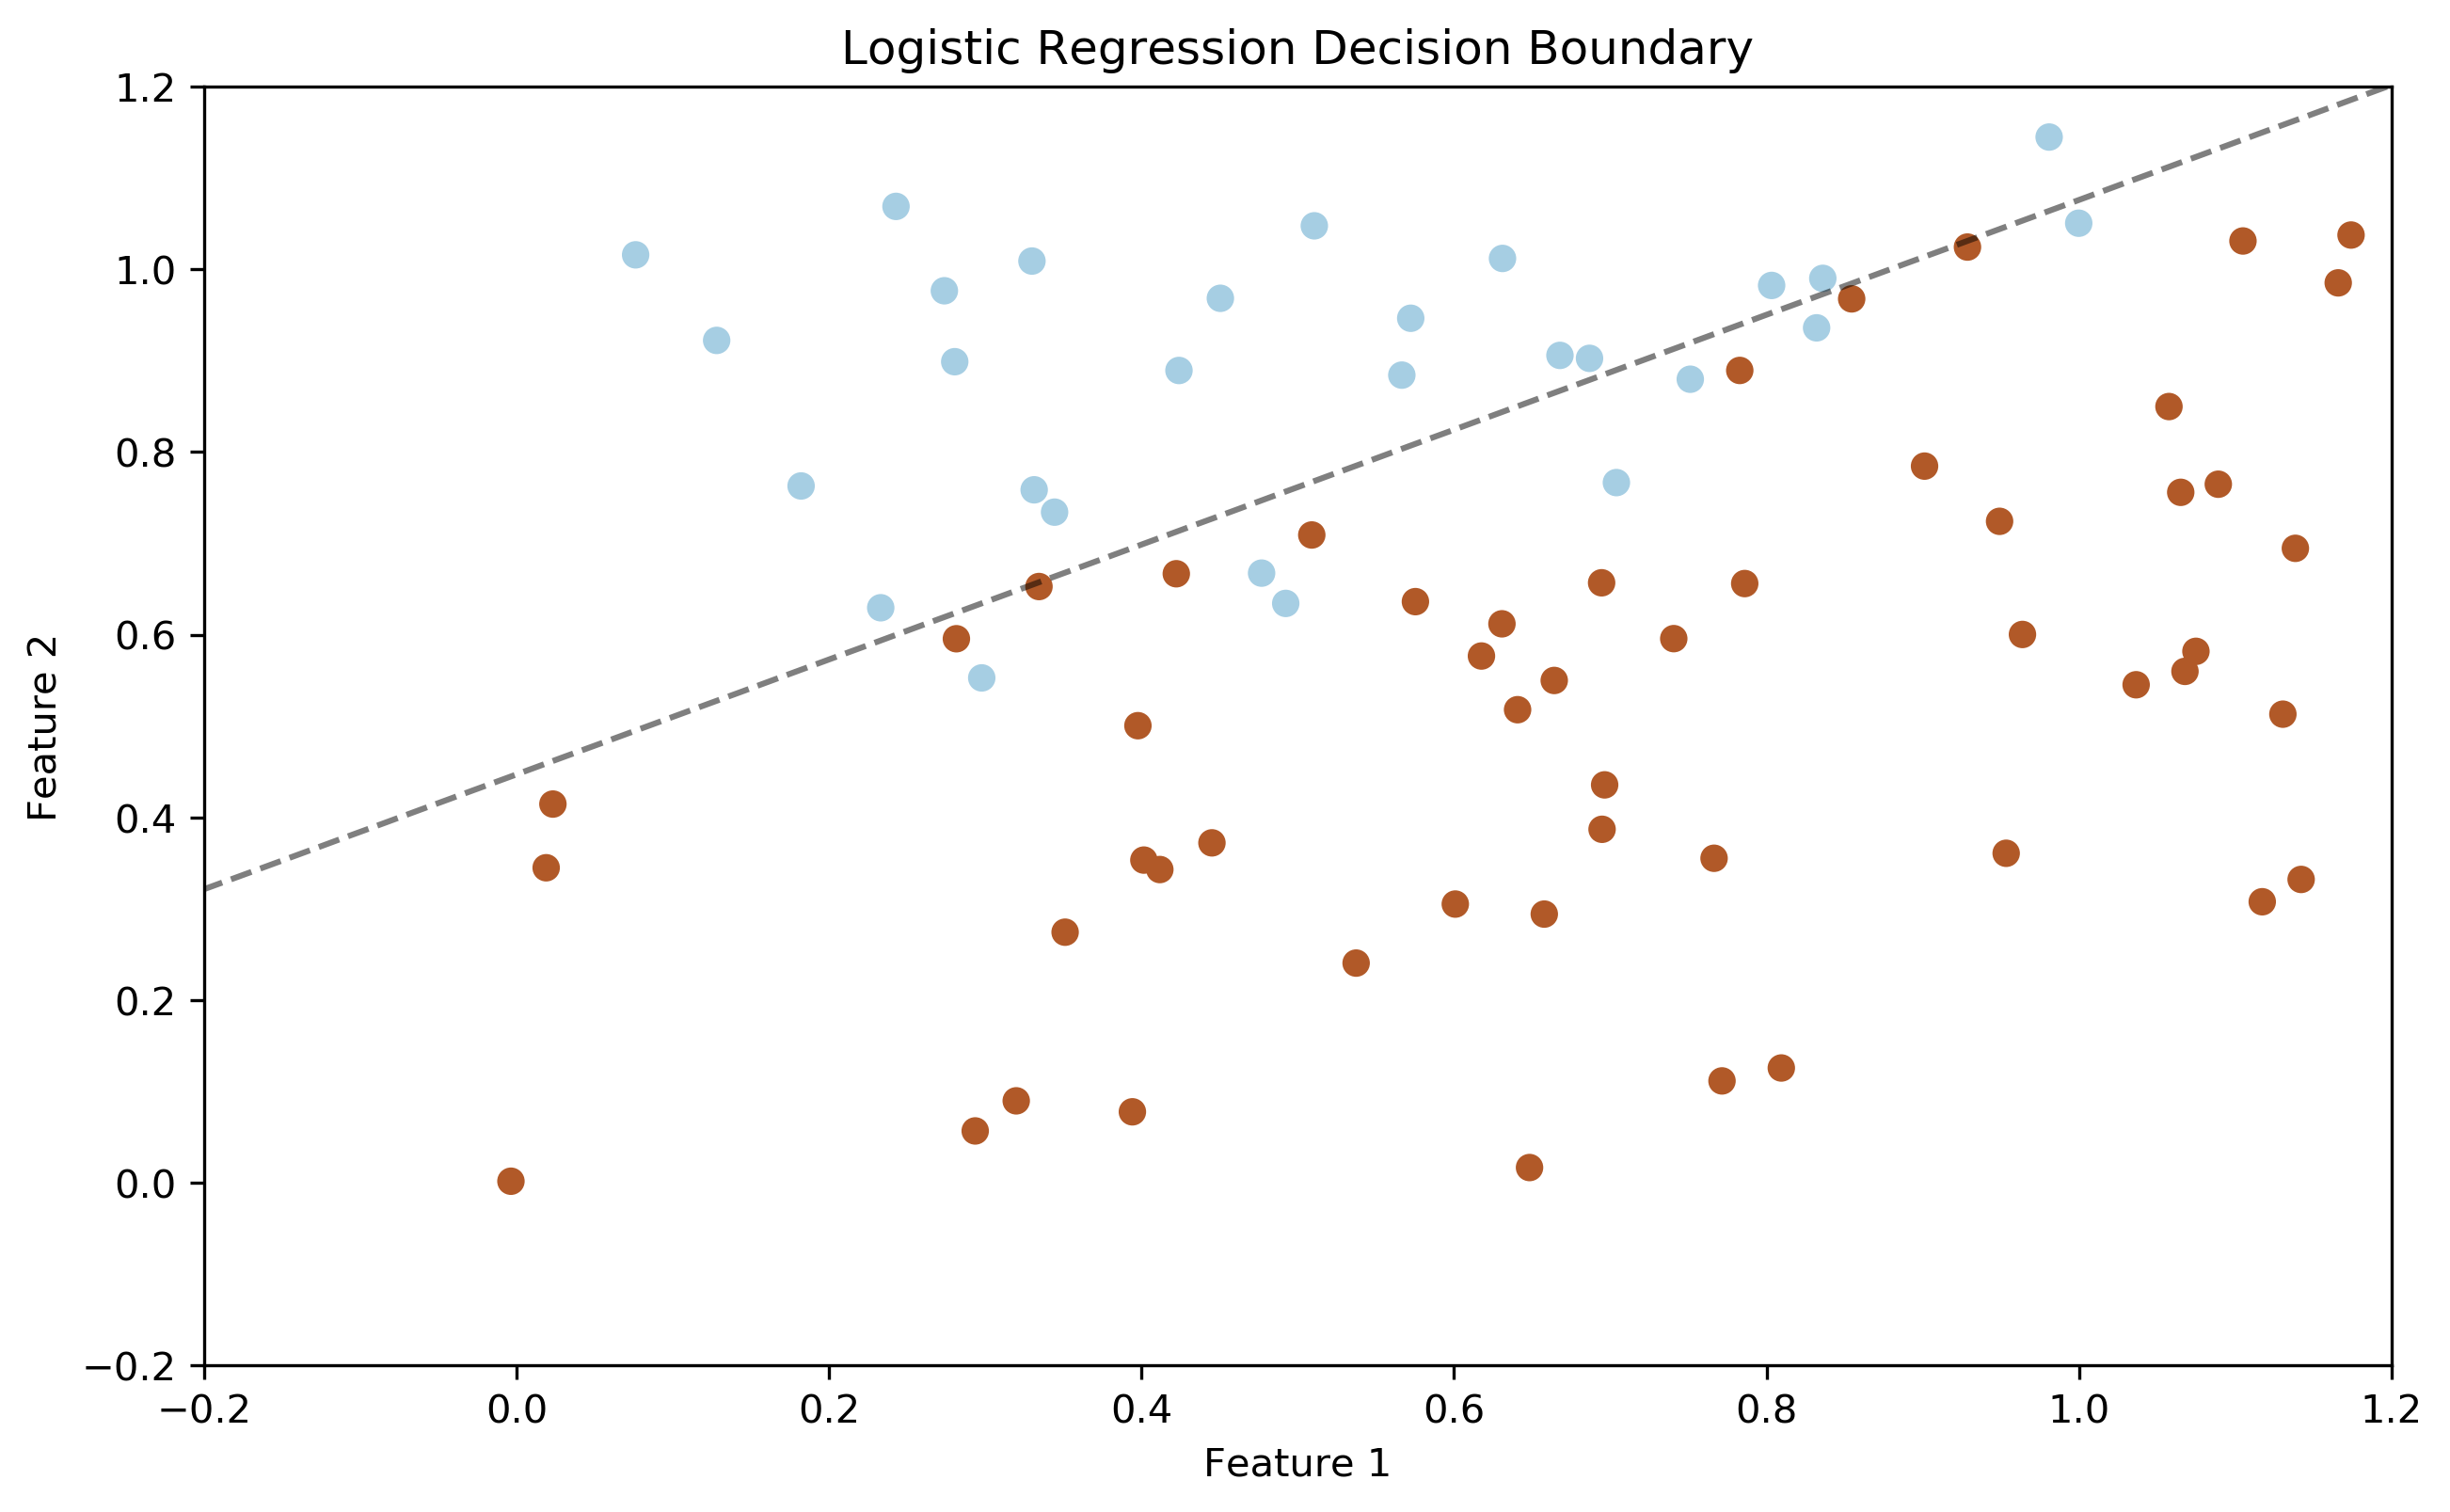

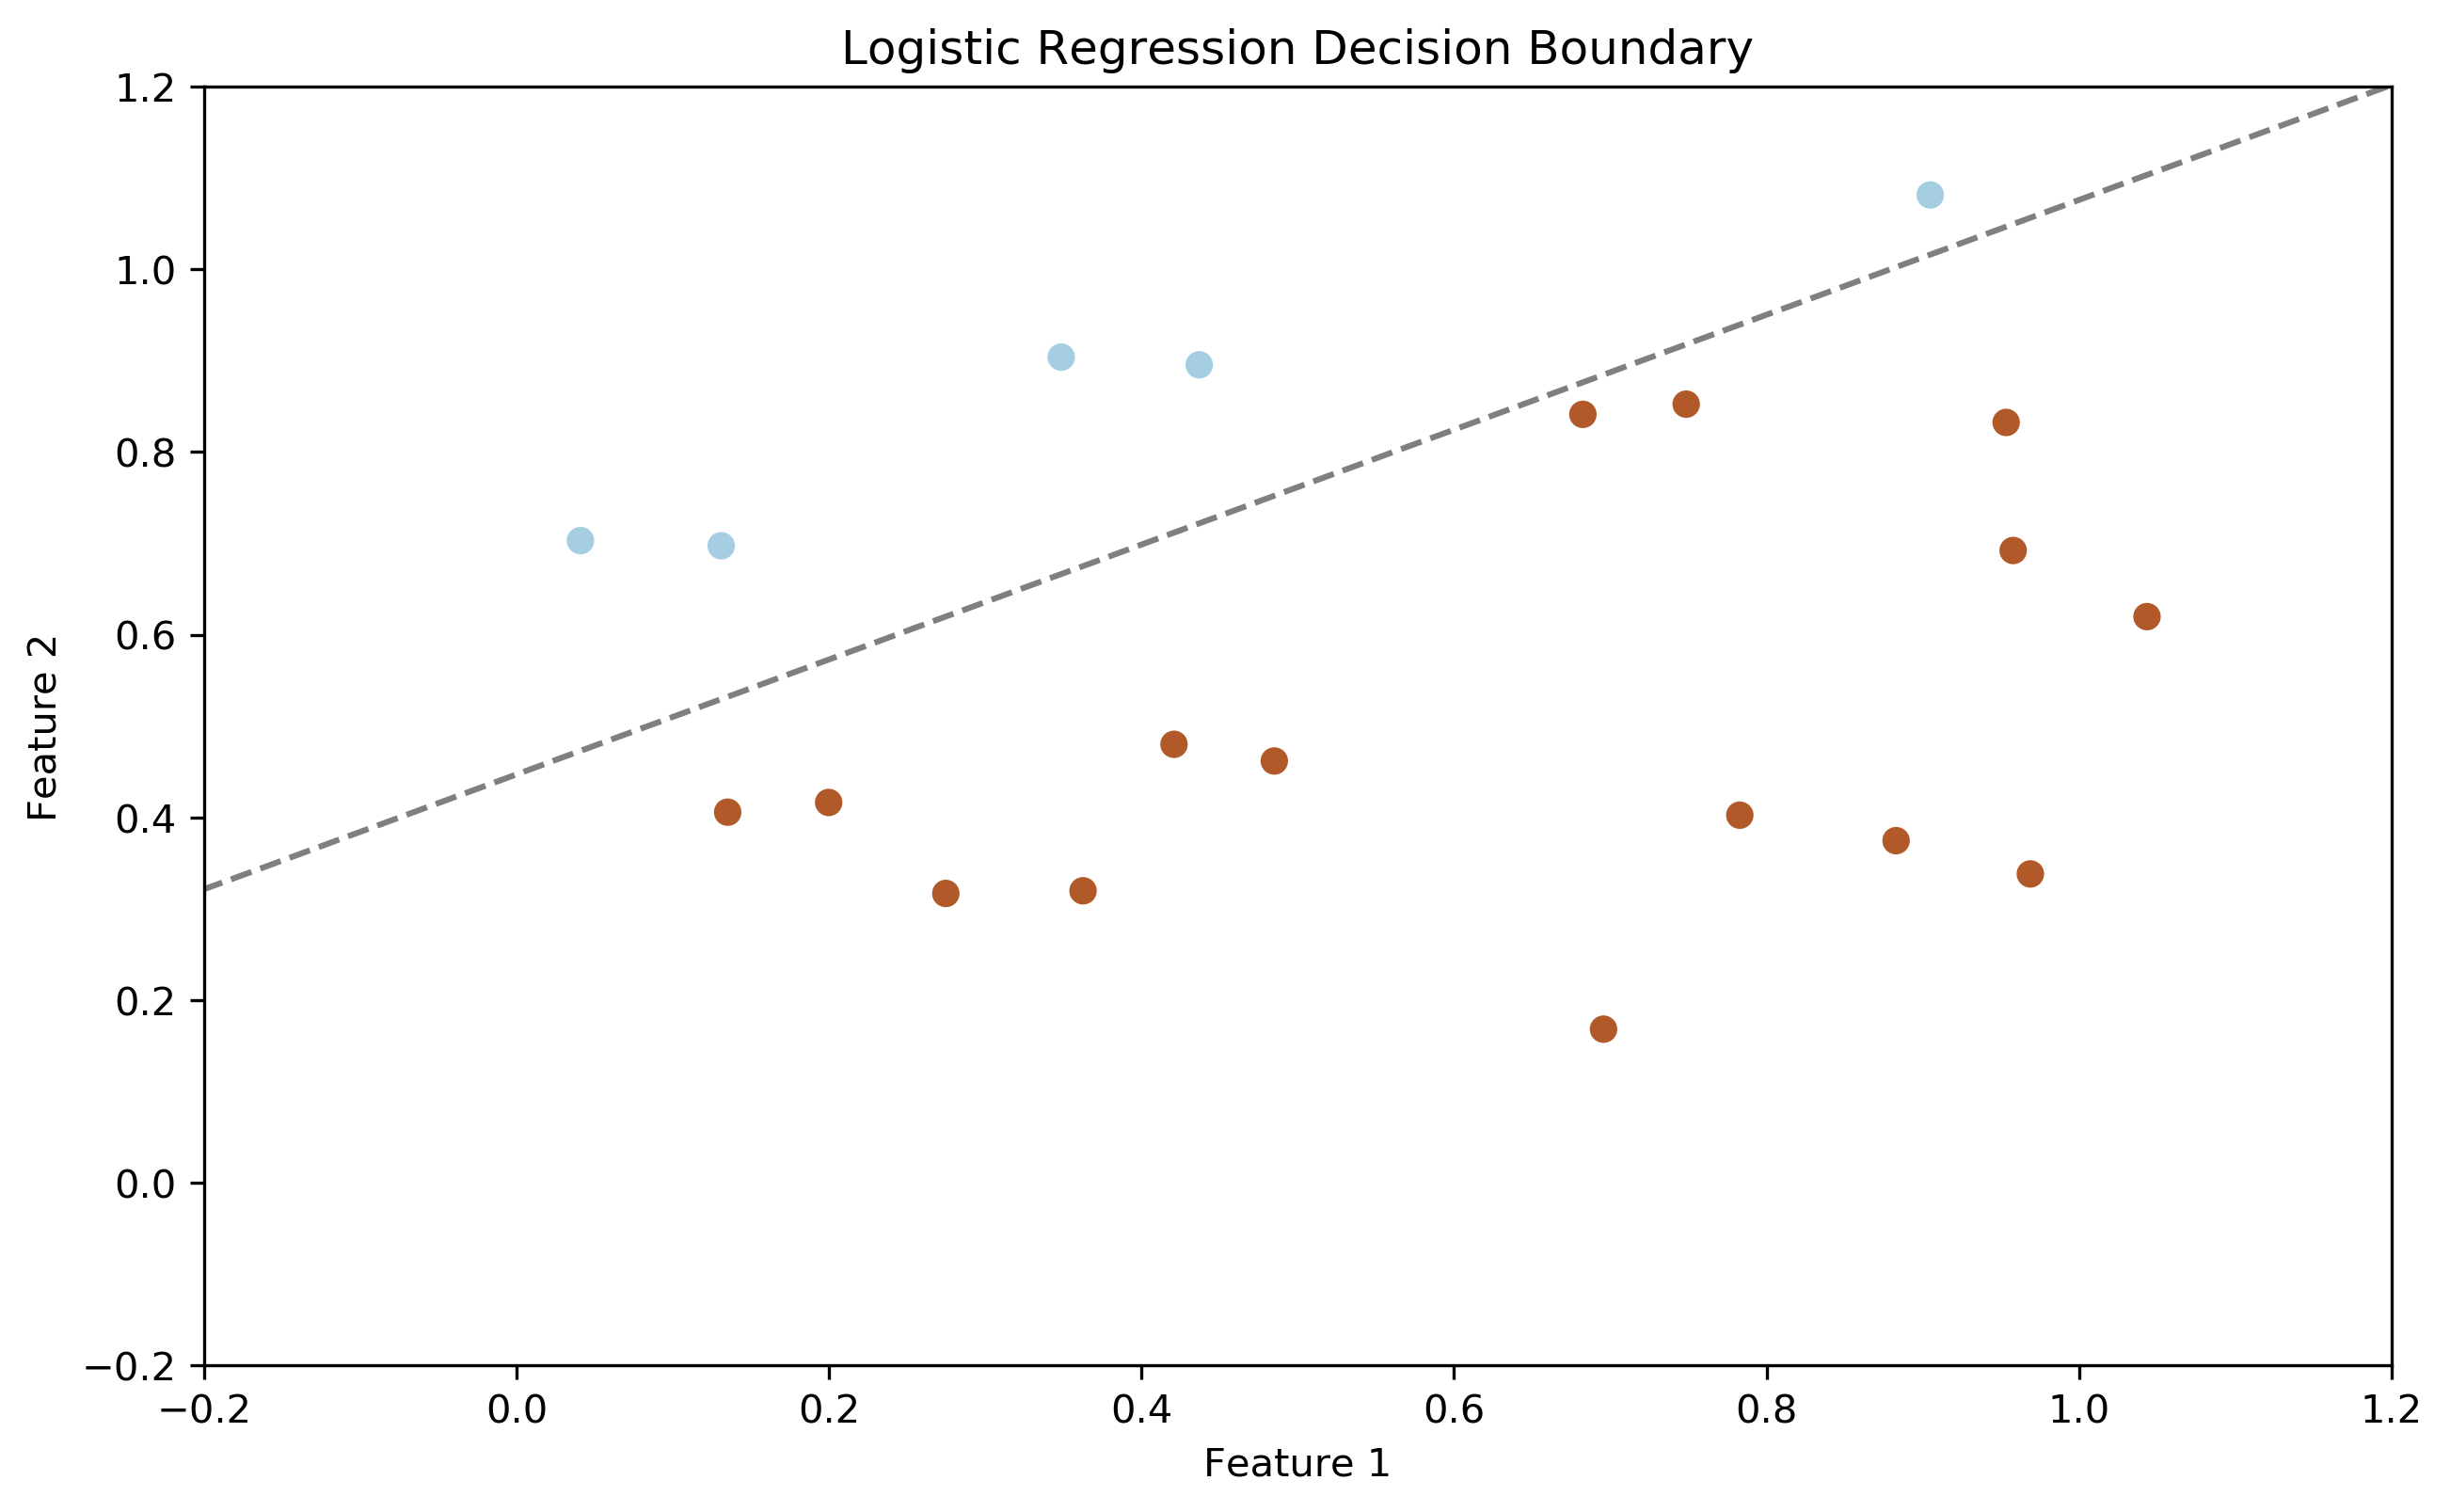

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set a random seed for reproducibility
np.random.seed(595)

# Generate random data for binary classification
X = np.random.rand(2, 100)  # Generate 100 random data points in 2D
w_true = np.array([1.5, -2.5])  # True weights for the data
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)  # Calculate probabilities
Y = (probabilities > 0.5).astype(int)  # Create binary labels based on probabilities

# Add some noise to the data
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split the data into training and testing sets
X_train, X_test = X[:, :80], X[:, 80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize model parameters
w = np.zeros(X.shape[0])
b = 0.0

# Define the learning rate and number of epochs
learning_rate = 14  # We can tune this value
num_epochs = 100  # We can tune this value

# Training the logistic regression model
for epoch in range(num_epochs):
    # Calculate the predicted probabilities for the training set
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients for the model parameters
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # Update model parameters using gradient descent
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Make predictions on the training and testing sets
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate and print the training and testing accuracy
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

plt.figure(dpi = 300, figsize = (10, 6))
# Plot the decision boundary for the training set
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

# Create a mesh grid to plot the decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

plt.figure(dpi = 300, figsize = (10, 6))
# Plot the decision boundary for the testing set
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

# Create a mesh grid to plot the decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)